CSV file './txt_0600um/break_235mm_96mm.csv' created successfully.


<Axes: xlabel='angle'>

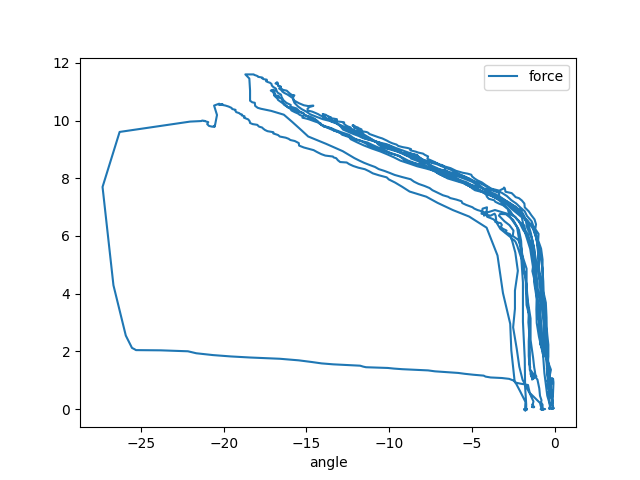

In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# file_path = "./txt_0600um/25deg_235mm.txt"
# file_path = "./txt_1000um/10deg_235mm.txt"
# file_path = "./txt_1000um/break_185mm.txt"
file_path = "./txt_0600um/break_235mm_96mm.txt"
# file_path = "./txt_1000um/break_185mm.txt"
# file_path = "./txt_fg/break_25x96mm.txt"


def parse_text_to_csv(file_path):
    # Open the text file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract the data from the lines
    data = {}
    column_labels = []
    for line in lines:
        line = line.strip()
        if line:
            parts = line.split(':')
            if len(parts) == 2:
                label = parts[0].strip()
                value = parts[1].strip()
                if label not in column_labels:
                    column_labels.append(label)
                if label not in data:
                    data[label] = []
                data[label].append(value)

    # Write the data into a CSV file
    csv_file_path = file_path.replace('.txt', '.csv')
    with open(csv_file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(column_labels)
        max_rows = max(len(data[label]) for label in column_labels)
        for i in range(max_rows):
            row = [data[label][i] if i < len(data[label]) else '' for label in column_labels]
            writer.writerow(row)

    print(f"CSV file '{csv_file_path}' created successfully.")
    return csv_file_path

# Usage example
csv_file_path = parse_text_to_csv(file_path)
df = pd.read_csv(csv_file_path)
df.plot('angle', 'force')

<Axes: xlabel='dist'>

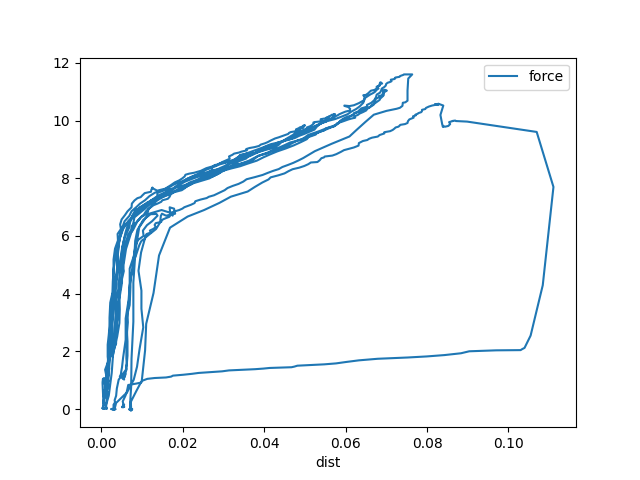

In [2]:
radius_fixed = 0.235
radius_swing = 0.235
df['dist'] = np.sqrt(radius_fixed**2 + radius_swing**2 - 2*radius_fixed*radius_swing*np.cos(np.radians(-df['angle'])))
df.plot('dist', 'force')

In [3]:
base1, base2 = (6.8, 10.4)
height = 0.065
0.5*(base1+base2)*height

0.5589999999999999

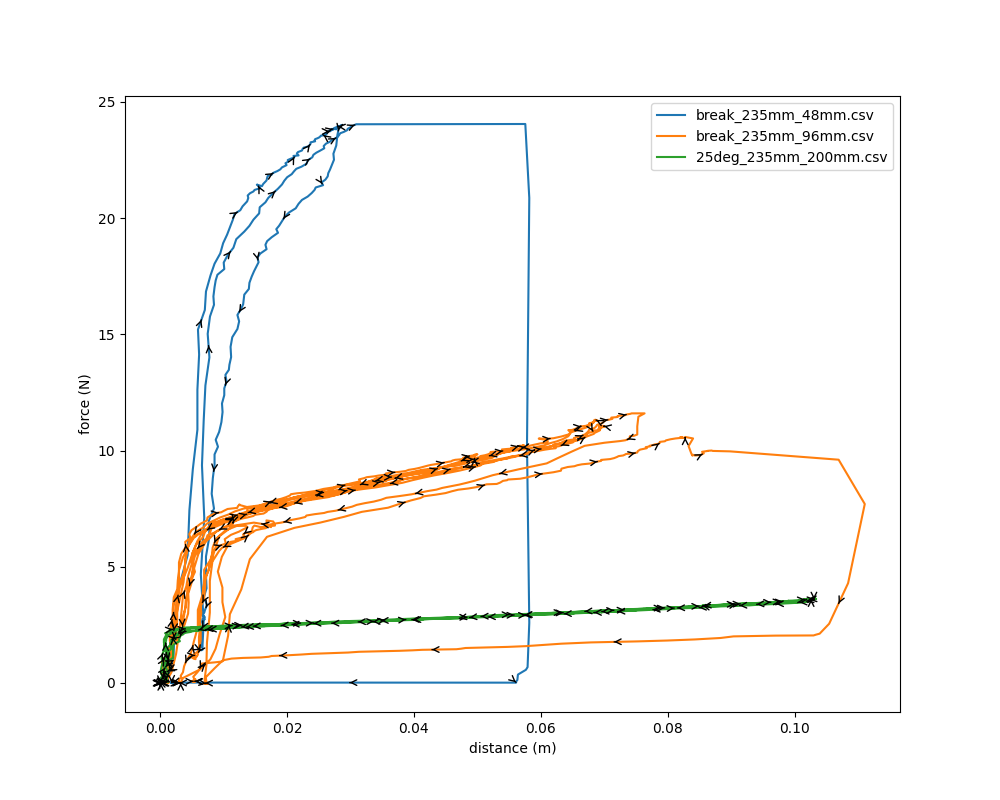

In [6]:

# dfs = [pd.read_csv(f"./txt_1000um/break_185mm.csv")]
files = [
    # "./txt_0600um/6deg_235mm_48mm.csv",
    "./txt_0600um/break_235mm_48mm.csv",
    "./txt_0600um/break_235mm_96mm.csv",
    "./txt_0600um/25deg_235mm_200mm.csv",
    # "./txt_1000um/10deg_235mm.csv",
    # "./txt_1000um/break_185mm.csv",
]
dfs = [pd.read_csv(file) for file in files]
subjects = range(len(dfs))

import os



# import glob
# dfs = [pd.read_csv(file) for file in glob.glob('./txt_0600um/*.csv')]



fig, axs = plt.subplots(1, 1, sharex=True, figsize=(10,8))
axs = [axs,axs]
for i in subjects:
    df = dfs[i]
    df['dist'] = np.sqrt(radius_fixed**2 + radius_swing**2 - 2*radius_fixed*radius_swing*np.cos(np.radians(-df['angle'])))
    x = df['dist'].values
    y = df['force'].values

    import scipy
    # x = scipy.signal.savgol_filter(x, window_length=11, polyorder=3)
    # y = scipy.signal.savgol_filter(y, window_length=11, polyorder=3)

    # x = x[::10]
    # y = y[::10]

    # Fit a line to x and y
    slope, intercept = np.polyfit(x, y, 1)
    y_dev = (y - (slope*x+intercept))

    # axs[0].plot(x,y, label=f"trial {i+1} F={round(slope,2)}*θ")
    # axs[0].plot(x,y, label=f"trial {i+1}")
    axs[0].plot(x,y, label=f"{os.path.basename(files[i])}")
    
    # axs[1].plot(x,y_dev, label=f"trial {i+1}")

    # calculate position and direction vectors for force
    x0 = x[range(len(x)-1)]
    x1 = x[range(1,len(x))]
    y0 = y[range(len(y)-1)]
    y1 = y[range(1,len(y))]
    xpos = (x0+x1)/2
    ypos = (y0+y1)/2
    xdir = x1-x0
    ydir = y1-y0
    arrow_int = 10
    for X,Y,dX,dY in zip(xpos[::arrow_int], ypos[::arrow_int], xdir[::arrow_int], ydir[::arrow_int]):
        axs[0].annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY), arrowprops=dict(arrowstyle="->", color='k'))

    # # calculate position and direction vectors for deviatino
    # x0 = x[range(len(x)-1)]
    # x1 = x[range(1,len(x))]
    # y0 = y_dev[range(len(y)-1)]
    # y1 = y_dev[range(1,len(y))]
    # xpos = (x0+x1)/2
    # ypos = (y0+y1)/2
    # xdir = x1-x0
    # ydir = y1-y0
    # arrow_int = 10
    # for X,Y,dX,dY in zip(xpos[::arrow_int], ypos[::arrow_int], xdir[::arrow_int], ydir[::arrow_int]):
    #     axs[1].annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY), arrowprops=dict(arrowstyle="->", color='k'))


[ax.legend() for ax in axs]
# axs[1].set_xlabel('angle (rad)')
axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('force (N)')
# axs[1].set_ylabel('deviation from F=kθ (N)')
plt.legend()
plt.show()
